## Assignment 2: Network Safety


#### CSC 180  Intelligent Systems (Spring 2020)

#### Ace English

# Helpful Functions for Tensorflow

In [9]:
from collections.abc import Sequence
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn import svm, datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)
    

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)
    
    
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Visualizing data


## Read data

In [10]:
#define datatypes for readability later
datatype={}

datatype["duration"] = "continuous"
datatype["protocol_type"] = "symbolic"
datatype["service"] = "symbolic"
datatype["flag"] = "symbolic"
datatype["src_bytes"] = "continuous"
datatype["dst_bytes"] = "continuous"
datatype["land"] = "symbolic"
datatype["wrong_fragment"] = "continuous"
datatype["urgent"] = "continuous"
datatype["hot"] = "continuous"
datatype["num_failed_logins"] = "continuous"
datatype["logged_in"] = "symbolic"
datatype["num_compromised"] = "continuous"
datatype["root_shell"] = "continuous"
datatype["su_attempted"] = "continuous"
datatype["num_root"] = "continuous"
datatype["num_file_creations"] = "continuous"
datatype["num_shells"] = "continuous"
datatype["num_access_files"] = "continuous"
datatype["num_outbound_cmds"] = "continuous"
datatype["is_host_login"] = "symbolic"
datatype["is_guest_login"] = "symbolic"
datatype["count"] = "continuous"
datatype["srv_count"] = "continuous"
datatype["serror_rate"] = "continuous"
datatype["srv_serror_rate"] = "continuous"
datatype["rerror_rate"] = "continuous"
datatype["srv_rerror_rate"] = "continuous"
datatype["same_srv_rate"] = "continuous"
datatype["diff_srv_rate"] = "continuous"
datatype["srv_diff_host_rate"] = "continuous"
datatype["dst_host_count"] = "continuous"
datatype["dst_host_srv_count"] = "continuous"
datatype["dst_host_same_srv_rate"] = "continuous"
datatype["dst_host_diff_srv_rate"] = "continuous"
datatype["dst_host_same_src_port_rate"] = "continuous"
datatype["dst_host_srv_diff_host_rate"] = "continuous"
datatype["dst_host_serror_rate"] = "continuous"
datatype["dst_host_srv_serror_rate"] = "continuous"
datatype["dst_host_rerror_rate"] = "continuous"
datatype["dst_host_srv_rerror_rate"] = "continuous"
datatype["outcome"] = "symbolic"


df = pd.read_csv("network_intrusion_data.csv")

#assign columns
df.columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome']

df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


# Data Examination
Now we clean the data. Part of this process is checking for redundant records and records with missing values. Like normal, we will encode categorical data and normalizing numerical data.

First we want to search for duplicates and remove them. Then we want to see what kind of sample sizes we can work with which each of these, so instead of just returning each list I want to produce a count.


In [11]:
df_dupes=df[df.duplicated()]
print ("Removing ",df_dupes.shape[0]," duplicate entries...")
df_unique=df.drop_duplicates()

#view all values
for (colName, colData) in df_unique.iteritems():
    valueCount=colData.drop_duplicates()
    print(colName, "-",valueCount.size, valueCount.values)

#check values count
i=0
for (colName, colData) in df_unique.iteritems():
    value_counts=colData.value_counts();
    print("Name: ",colName," Type: ",list(datatype)[i], "Size:", value_counts.size)
    print(value_counts.sort_values(ascending=False))
    print()
    i=i+1

Removing  348435  duplicate entries...
duration - 2495 [   0    1   79 ... 2695 2751  120]
protocol_type - 3 ['tcp' 'udp' 'icmp']
service - 66 ['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i']
flag - 11 ['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH']
src_bytes - 3300 [239 235 219 ... 500 484 475]
dst_bytes - 10725 [  486  1337  2032 ... 34557 10592 13828]
land - 2 [0 1]
wrong_fragment - 3 [0 1 3]
urgent - 4 [0 2 1 3]
hot - 22 [ 0  1  3 19  6  4 30 

dst_host_count - 256 [ 19  29  39  49  59   1  11   8  18  28  38   4  14  24  34  44  54  64
  74  84  94   3  13  23   5  21  31  41   2  12  22  32  42  52  62  72
  82  10  20  30  40  51  61  71  81  91 101 111 121 131 141 151 161 171
 181 191 201 211 221 231 241 251 255   6  16  26  33  43  53  63  73  83
  93 103 113 123 133 143   7  17  27  15  25  35  45 104 114 124 134 144
 154 164 174 184 194 204 214 224 234 244 254  48  58  68  78  88  98 108
 118  55  65  75  85  95  36  46  56  66  76  86  96 106 116 126 136 146
 156 166 176 186 196 206 216 226 236 246  92 102 112 122 132 142 152 162
 172 182 192 202 212 222 232 242 252   9  50  60  70  80  90 100  37  47
  57  67 110 120 130 140 150 160 170 180  77  87  97  69  79  89  99 109
 105 115 125 135 145 128 138 148 158 168 178 188 198 208 218 228 238 248
 153 163 173 183 193 203 213 223 233 243 253 107 117 127 137 147 157 167
 177 187 197 207 217 227 237 247 155 165 175 190 200 210 220 230 240 250
 119 129 139 149 159 169 179 1

Name:  dst_host_count  Type:  dst_host_count Size: 256
255    86128
1       2078
2       1789
3       1338
4       1233
       ...  
226       70
254       70
236       63
246       61
0          3
Name: dst_host_count, Length: 256, dtype: int64

Name:  dst_host_srv_count  Type:  dst_host_srv_count Size: 256
255    54739
1       6242
2       4373
3       3186
4       2906
       ...  
211       59
218       57
202       56
204       51
0          3
Name: dst_host_srv_count, Length: 256, dtype: int64

Name:  dst_host_same_srv_rate  Type:  dst_host_same_srv_rate Size: 101
1.00    64092
0.02     8196
0.04     8060
0.05     7693
0.01     7344
        ...  
0.30      155
0.34      149
0.21      149
0.41      148
0.42      143
Name: dst_host_same_srv_rate, Length: 101, dtype: int64

Name:  dst_host_diff_srv_rate  Type:  dst_host_diff_srv_rate Size: 101
0.00    63316
0.07    21237
0.06    13739
0.08     9524
0.05     8233
        ...  
0.97       11
0.94        9
0.93        8
0.92        7
0

All this data looks valid.

`num_outbound_cmds` and `is_host_login` both have only 1 entry type, so they can be dropped.

We also see that several of the fields have a huge disparity in volume. `urgent` is almost entirely 0. Several other fields have a huge majority of one field with other fields being rare. However, several of these may be crucial for finding attacks.


`wrong_fragment`, `num_failed_logins`, `num_compromised`, `hot`, `root_shell`, `su_attempted`, `num_root`, `num_file_creations`, `num_shells`, `is_guest_login`, `num_access_files`

## Separating attacks from normal
We will filter off the attacks from the normal dataspace to see if their representation makes more sense when looking at non-normal data.

In [12]:
#drop worthless data
df_unique=df_unique.drop(['is_host_login','num_outbound_cmds'], axis=1)

#remove rows with missing data
df_unique=df_unique.dropna()

outliers=['outcome','land','wrong_fragment', 'num_failed_logins', 'num_compromised', 'hot', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'is_guest_login', 'num_access_files']
df_normals=df_unique[df_unique['outcome']=='normal.']
df_attacks=df_unique.drop(df_normals.index)

i=0
for (colName, colData) in df_attacks.iteritems():
    if(colName in outliers):
        value_counts=colData.value_counts();
        print("Name: ",colName," Type: ",list(datatype)[i], "Size:", value_counts.size)
        print(value_counts.sort_values(ascending=False))
        print()
    i=i+1

Name:  land  Type:  land Size: 2
0    57735
1       19
Name: land, dtype: int64

Name:  wrong_fragment  Type:  wrong_fragment Size: 3
0    56633
3      910
1      211
Name: wrong_fragment, dtype: int64

Name:  hot  Type:  hot Size: 14
0     56339
2       917
28      274
1       133
3        34
5        16
4        15
20        9
6         8
19        5
7         1
10        1
15        1
18        1
Name: hot, dtype: int64

Name:  num_failed_logins  Type:  num_failed_logins Size: 3
0    57701
1       52
5        1
Name: num_failed_logins, dtype: int64

Name:  num_compromised  Type:  num_compromised Size: 10
0     56832
1       901
2         8
4         7
3         1
5         1
6         1
38        1
16        1
22        1
Name: num_compromised, dtype: int64

Name:  root_shell  Type:  root_shell Size: 2
0    57722
1       32
Name: root_shell, dtype: int64

Name:  su_attempted  Type:  su_attempted Size: 2
0    57753
1        1
Name: su_attempted, dtype: int64

Name:  num_root  Type:  

Surprisingly a lot of these values are still disproportionate even among errors only. Many of them will get dropped later.

`num_failed_logins`,`root_shell`,`su_attempted`,`num_root`, `num_file_creations`,`num_shells`, `num_access_files` seem irrelevent and have very little data to go off of.

## Data prep
Next I'm going to format the arrays in a useful way. To encode output as safe/unsafe, I will add another layer "attack" and drop the layer "outcome" (I supsect the neural network will rely too heavily on it if I leave it in.)

I am also going to apply **downsampling** here so that the quantity of good connections more closely matches the volume of attacks.

### Normalization and one-hot encoding

For `outcome` we don't care what the error code is (just that it is not normal), thus we went to one-hot encode for 2 values - normal and attack. After normalization columns may get dropped because the values are not significant enough to be nonzero. This is fine.

In [13]:
drop_columns=['urgent','land','num_failed_logins', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 
              'num_shells', 'num_access_files']
#Model using fewer of the good samples - same number as most common error
df_downsampled=df_normals.sample(51820).append(df_attacks)
#model dropping rows that might be irrelevent
df_slim=df_unique.drop(drop_columns,axis=1)
#model dropping irrelevent rows AND using downsampling
df_slim_downsampled=df_downsampled.drop(drop_columns,axis=1)
#use 10% of data for model
df_sample=df_slim_downsampled.sample(frac=0.1)


#map for encoding
def make_binary(string):
    if(string=="normal."):
        return 0
    else:
        return 1

#encode y
y=df_sample["outcome"].map(make_binary)
y_test_model=df_slim["outcome"].map(make_binary)
print(y)

y_one_hot = tf.keras.utils.to_categorical(y, 2)

print(y_one_hot)
#get arrays for training

x=df_sample.drop(["outcome"], axis=1)


#prep for model
for (name,column) in x.iteritems():
    if(datatype[name]=='continuous'):
        encode_numeric_zscore(x, name)
    else:
        encode_text_dummy(x,name)



35355     0
66396     1
140843    1
124806    1
57275     1
         ..
356194    1
458688    0
7548      0
14384     0
107607    0
Name: outcome, Length: 10957, dtype: int64
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


After data prep some colums may now have no different values in them, in essence the rare values to a general majority may have been entirely dropped so the one-hot encoded label is now empty.

# Model training and testing
> Debugging by hand is like trying to find tiny holes in a dartboard covered in cloth...and you only have 5 darts.


To compare models, we are comparing the **accuracy, recall, precision** and **F1** score. For each type of model we will test different variable weights.
## Fully connected Neural Network
- Activation: **relu**, **sigmoid**, **tanh**
- **Layer count**: 1,2,3
- **Neuron count**: 50, 100, 250
- Optimizer: **Adam**, **SGC**

3\*3\*3\*2=54 configurations to try

In [27]:
def test_model(y_test, pred):
    #use argmax to homogenize array
    pred = np.argmax(pred,axis=1)
    print(pred)
    y_true = np.argmax(y_test,axis=1)
    print(pred)
    
    
    
    cm = confusion_matrix(y_true, pred)
    print(cm)


    labels=["good","attack"]
    plt.figure()
    plot_confusion_matrix(cm, labels)
    plt.show()
    
    print(classification_report(y_true, pred))
    plot_roc(pred,y_true)

In [28]:
def test_nn(activation, num_layers, num_neurons, optimizer, x_train,y_train,x_test,y_test):
    print("Fully connected neural network")
    print("Activation:",activation,"Number of layers: ",num_layers+2,"Number of neurons:",num_neurons,"Optimizer:",optimizer)

   # Build network
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=x_train.shape[1], activation=activation))
    #model.add(Dense(num_neurons, input_dim=2, activation=activation))
    current=num_neurons
    interval=num_neurons/(num_layers+1)
    for i in range(num_layers):
        current=current-interval
        model.add(Dense(current, activation=activation))
        
    model.add(Dense(2, activation='softmax'))
        
    model.compile(loss='categorical_crossentropy', optimizer=optimizer)
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')  
    model.fit(x_train, y_train, validation_data=(x_test,y_test), callbacks=[monitor], verbose=2, epochs=1000)
    
    #test model
    pred = model.predict(x_test)
    print(pred)
    test_model(y_test, pred)
    
    return model
    



[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Fully connected neural network
Activation: relu Number of layers:  3 Number of neurons: 100 Optimizer: adam
Train on 8217 samples, validate on 2740 samples
Epoch 1/1000
8217/8217 - 1s - loss: 0.0745 - val_loss: 0.0327
Epoch 2/1000
8217/8217 - 1s - loss: 0.0224 - val_loss: 0.0292
Epoch 3/1000
8217/8217 - 1s - loss: 0.0187 - val_loss: 0.0271
Epoch 4/1000
8217/8217 - 1s - loss: 0.0140 - val_loss: 0.0253
Epoch 5/1000
8217/8217 - 1s - loss: 0.0120 - val_loss: 0.0249
Epoch 6/1000
8217/8217 - 1s - loss: 0.0106 - val_loss: 0.0277
Epoch 00006: early stopping
[[3.5809854e-04 9.9964190e-01]
 [1.0110505e-06 9.9999905e-01]
 [4.5052229e-07 9.9999952e-01]
 ...
 [1.8677754e-06 9.9999809e-01]
 [9.9996650e-01 3.3500808e-05]
 [9.7789854e-01 2.2101501e-02]]
[1 1 1 ... 1 0 0]
[1 1 1 ... 1 0 0]
[[1267    4]
 [  14 1455]]


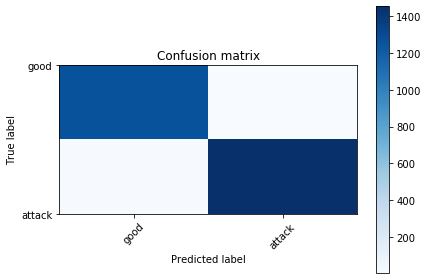

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1271
           1       1.00      0.99      0.99      1469

    accuracy                           0.99      2740
   macro avg       0.99      0.99      0.99      2740
weighted avg       0.99      0.99      0.99      2740



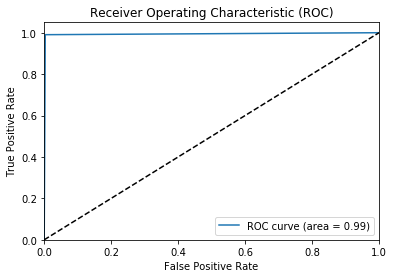

In [29]:
 # Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y_one_hot, test_size=0.25, random_state=42) 

print(y_train)
test_nn('relu',1,100,'adam',x_train,y_train,x_test,y_test)

In [ ]:
test_nn('relu',1,100,'adam',x_train,y_train,x_test,y_test)
test_nn('sigmoid',1,100,'adam',x_train,y_train,x_test,y_test)
test_nn('tanh',1,100,'adam',x_train,y_train,x_test,y_test)
#sgd
test_nn('relu',1,100,'sgd',x_train,y_train,x_test,y_test)
test_nn('sigmoid',1,100,'sgd',x_train,y_train,x_test,y_test)
test_nn('tanh',1,100,'sgd',x_train,y_train,x_test,y_test)
#layer count
test_nn('relu',2,100,'adam',x_train,y_train,x_test,y_test)
test_nn('sigmoid',2,100,'adam',x_train,y_train,x_test,y_test)
test_nn('tanh',2,100,'adam',x_train,y_train,x_test,y_test)
test_nn('relu',2,100,'sgd',x_train,y_train,x_test,y_test)
test_nn('sigmoid',2,100,'sgd',x_train,y_train,x_test,y_test)
test_nn('tanh',2,100,'sgd',x_train,y_train,x_test,y_test)
test_nn('relu',3,100,'adam',x_train,y_train,x_test,y_test)
test_nn('sigmoid',3,100,'adam',x_train,y_train,x_test,y_test)
test_nn('tanh',3,100,'adam',x_train,y_train,x_test,y_test)
test_nn('relu',3,100,'sgd',x_train,y_train,x_test,y_test)
test_nn('sigmoid',3,100,'sgd',x_train,y_train,x_test,y_test)
test_nn('tanh',3,100,'sgd',x_train,y_train,x_test,y_test)
#neron count
test_nn('relu',2,50,'adam',x_train,y_train,x_test,y_test)
test_nn('sigmoid',2,50,'adam',x_train,y_train,x_test,y_test)
test_nn('tanh',2,50,'adam',x_train,y_train,x_test,y_test)
test_nn('relu',2,50,'sgd',x_train,y_train,x_test,y_test)
test_nn('sigmoid',2,50,'sgd',x_train,y_train,x_test,y_test)
test_nn('tanh',2,50,'sgd',x_train,y_train,x_test,y_test)
test_nn('relu',3,50,'adam',x_train,y_train,x_test,y_test)
test_nn('sigmoid',3,50,'adam',x_train,y_train,x_test,y_test)
test_nn('tanh',3,50,'adam',x_train,y_train,x_test,y_test)
test_nn('relu',3,50,'sgd',x_train,y_train,x_test,y_test)
test_nn('sigmoid',3,50,'sgd',x_train,y_train,x_test,y_test)
test_nn('tanh',3,50,'sgd',x_train,y_train,x_test,y_test)
test_nn('relu',2,250,'adam',x_train,y_train,x_test,y_test)
test_nn('sigmoid',2,250,'adam',x_train,y_train,x_test,y_test)
test_nn('tanh',2,250,'adam',x_train,y_train,x_test,y_test)
test_nn('relu',2,250,'sgd',x_train,y_train,x_test,y_test)
test_nn('sigmoid',2,250,'sgd',x_train,y_train,x_test,y_test)
test_nn('tanh',2,250,'sgd',x_train,y_train,x_test,y_test)
test_nn('relu',3,250,'adam',x_train,y_train,x_test,y_test)
test_nn('sigmoid',3,250,'adam',x_train,y_train,x_test,y_test)
test_nn('tanh',3,250,'adam',x_train,y_train,x_test,y_test)
test_nn('relu',3,250,'sgd',x_train,y_train,x_test,y_test)
test_nn('sigmoid',3,250,'sgd',x_train,y_train,x_test,y_test)
test_nn('tanh',3,250,'sgd',x_train,y_train,x_test,y_test)



## Convolutional Neural Network
All of the same from Neural Network plus 

-**kernal number**: 128, 64
-**kernal size**: 1x1, 1x3, 1x5

54\*2\*3=324 configurations to try

In [30]:
#prep data for cnn by treating as a 1 height image
img_data = x.values.reshape((x.shape[0], 1, x.shape[1], 1))
x_cnn_train, x_cnn_test, y_cnn_train, y_cnn_test = train_test_split(img_data, y_one_hot, test_size=0.25, random_state=42) 

print(x_cnn_train.shape)
print(y_cnn_train.shape)
print(x_cnn_test.shape)
print(y_cnn_test.shape)

def test_cnn(activation, num_layers, num_neurons, optimizer, num_kernels, kernel_size, x_train,y_train,x_test,y_test):
    print("Convolutional neural network")
    print("Activation:",activation,"Number of layers: ",num_layers+2,"Number of neurons:",num_neurons,
          "Number of kernels",num_kernels,"Kernel size", kernel_size,"Optimizer:",optimizer)
    cnn = Sequential()
    
    cnn.add(Conv2D(num_kernels, kernel_size=(1, kernel_size), strides=(1, 1),
                     activation=activation,
                     input_shape=(x_cnn_train.shape[1:])))
    cnn.add(MaxPooling2D(pool_size=(1,2)))

    cnn.add(Conv2D(num_kernels*2, kernel_size=(1, 3), strides=(1, 1),
                     activation='relu',
                     input_shape=(x_cnn_train.shape[1:])))
    cnn.add(MaxPooling2D(pool_size=(1,2)))


    cnn.add(Flatten())
    
    current=num_neurons
    interval=num_neurons/(num_layers+1)
    for i in range(num_layers):
        current=current-interval
        cnn.add(Dense(num_kernels*4, activation=activation))
        cnn.add(Dropout(0.5))
    
    cnn.add(Dense(2, activation="softmax"))

    # define optimizer and objective, compile cnn

    cnn.compile(loss="categorical_crossentropy", optimizer=optimizer)
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')  
    cnn.fit(x_cnn_train, y_cnn_train, validation_data=(x_cnn_test,y_cnn_test), callbacks=[monitor], verbose=2, epochs=1000)

    pred = cnn.predict(x_cnn_test)
    print(pred.shape)
    print(y_cnn_test.shape)
    test_model(y_cnn_test, pred)

(8217, 1, 100, 1)
(8217, 2)
(2740, 1, 100, 1)
(2740, 2)


Convolutional neural network
Activation: relu Number of layers:  3 Number of neurons: 100 Number of kernels 128 Kernel size 3 Optimizer: adam
Train on 8217 samples, validate on 2740 samples
Epoch 1/1000
8217/8217 - 14s - loss: 0.0546 - val_loss: 0.0453
Epoch 2/1000
8217/8217 - 14s - loss: 0.0298 - val_loss: 0.0333
Epoch 3/1000
8217/8217 - 13s - loss: 0.0236 - val_loss: 0.0380
Epoch 4/1000
8217/8217 - 13s - loss: 0.0217 - val_loss: 0.0377
Epoch 00004: early stopping
(2740, 2)
(2740, 2)
[1 1 1 ... 1 0 0]
[1 1 1 ... 1 0 0]
[[1266    5]
 [  16 1453]]


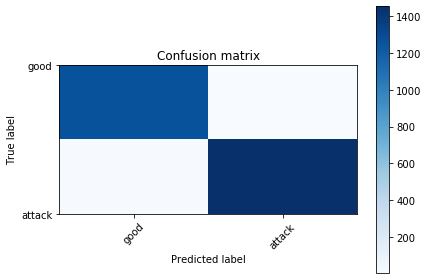

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1271
           1       1.00      0.99      0.99      1469

    accuracy                           0.99      2740
   macro avg       0.99      0.99      0.99      2740
weighted avg       0.99      0.99      0.99      2740



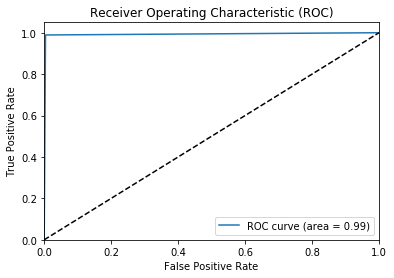

In [31]:
test_cnn('relu',1,100,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)

In [ ]:
test_nn('relu',1,100,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,100,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,100,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#sdg
test_nn('relu',1,100,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,100,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,100,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#layer count
test_nn('relu',2,100,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,100,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,100,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,100,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,100,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,100,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',3,100,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',3,100,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',3,100,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',3,100,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',3,100,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',3,100,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#neron count
test_nn('relu',2,50,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,50,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,50,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,50,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,50,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,50,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',3,50,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',3,50,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',3,50,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',3,50,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',3,50,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',3,50,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,250,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,250,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,250,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,250,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,250,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,250,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',3,250,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',3,250,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',3,250,'adam',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',3,250,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',3,250,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',3,250,'sdg',128,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#kernel size
test_nn('relu',1,100,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,100,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,100,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#sdg
test_nn('relu',1,100,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,100,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,100,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#layer count
test_nn('relu',2,100,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,100,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,100,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,100,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,100,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,100,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',1,100,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,100,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,100,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',1,100,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,100,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,100,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#neron count
test_nn('relu',2,50,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,50,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,50,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,50,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,50,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,50,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',1,50,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,50,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,50,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',1,50,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,50,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,50,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,250,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,250,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,250,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,250,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,250,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,250,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',1,250,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,250,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,250,'adam',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',1,250,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,250,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,250,'sdg',128,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',1,100,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,100,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,100,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#sdg
test_nn('relu',1,100,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,100,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,100,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#layer count
test_nn('relu',2,100,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,100,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,100,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,100,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,100,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,100,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',5,100,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',5,100,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',5,100,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',5,100,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',5,100,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',5,100,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#neron count
test_nn('relu',2,50,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,50,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,50,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,50,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,50,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,50,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',5,50,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',5,50,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',5,50,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',5,50,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',5,50,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',5,50,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,250,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,250,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,250,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,250,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,250,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,250,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',5,250,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',5,250,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',5,250,'adam',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',5,250,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',5,250,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',5,250,'sdg',128,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#num kernels
test_nn('relu',1,100,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,100,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,100,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#sdg
test_nn('relu',1,100,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,100,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,100,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#layer count
test_nn('relu',2,100,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,100,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,100,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,100,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,100,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,100,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',3,100,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',3,100,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',3,100,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',3,100,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',3,100,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',3,100,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#neron count
test_nn('relu',2,50,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,50,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,50,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,50,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,50,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,50,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',3,50,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',3,50,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',3,50,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',3,50,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',3,50,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',3,50,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,250,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,250,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,250,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,250,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,250,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,250,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',3,250,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',3,250,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',3,250,'adam',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',3,250,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',3,250,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',3,250,'sdg',64,3,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#kernel size
test_nn('relu',1,100,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,100,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,100,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#sdg
test_nn('relu',1,100,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,100,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,100,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#layer count
test_nn('relu',2,100,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,100,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,100,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,100,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,100,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,100,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',1,100,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,100,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,100,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',1,100,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,100,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,100,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#neron count
test_nn('relu',2,50,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,50,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,50,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,50,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,50,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,50,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',1,50,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,50,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,50,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',1,50,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,50,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,50,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,250,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,250,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,250,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,250,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,250,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,250,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',1,250,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,250,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,250,'adam',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',1,250,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,250,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,250,'sdg',64,1,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',1,100,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,100,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,100,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#sdg
test_nn('relu',1,100,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',1,100,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',1,100,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#layer count
test_nn('relu',2,100,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,100,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,100,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,100,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,100,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,100,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',5,100,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',5,100,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',5,100,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',5,100,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',5,100,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',5,100,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
#neron count
test_nn('relu',2,50,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,50,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,50,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,50,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,50,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,50,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',5,50,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',5,50,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',5,50,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',5,50,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',5,50,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',5,50,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,250,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,250,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,250,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',2,250,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',2,250,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',2,250,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',5,250,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',5,250,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',5,250,'adam',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('relu',5,250,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('sigmoid',5,250,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
test_nn('tanh',5,250,'sdg',64,5,x_cnn_train,y_cnn_train,x_cnn_test,y_cnn_test)
